In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy


from google.colab import drive

from sklearn import tree
from sklearn.base import clone
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

In [2]:
def is_leaf(model, index):
  if ((model.tree_.children_left[index] == -1) and (model.tree_.children_right[index] == -1)) :
    return True
  else:
    return False

In [3]:
def print_model(model):
  plt.figure(figsize=(23, 23))
  plot_tree(model, filled=True)
  plt.show()

In [4]:
def prune_tree(model, index, x_value, y_value):
     # Base case: If the node is a leaf, do nothing
    if is_leaf(dtc, index):
      return

    #hold old values
    left_child = model.tree_.children_left[index]
    right_child = model.tree_.children_right[index]

    current_accuracy = model.score(x_value, y_value)


    prune_tree(model, left_child, x_value, y_value)
    prune_tree(model, right_child, x_value, y_value)

    #make them leaf nodes
    model.tree_.children_left[index] = -1
    model.tree_.children_right[index] = -1

    new_accuracy = model.score(x_value, y_value)

    #measure accuracy for changed tree

    if(new_accuracy < current_accuracy): #if pruning doesn't improve accuracy add children back
      model.tree_.children_left[index] = left_child
      model.tree_.children_right[index] = right_child

In [5]:
def plot_metrics(list1,list1_title, list2, list2_title, downsample=False, ds_value=1, x_title='X', y_title='Y', plot_title='Plot'):

    if downsample == True:
        list1 = list1[::ds_value]
        list2 = list2[::ds_value]

    plt.figure().set_figwidth(15)
    plt.grid(True)

    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(plot_title)

    plt.plot(list1, label=list1_title)
    plt.plot(list2, label=list2_title)

    plt.legend()
    plt.show()

In [6]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/SENG 474/Assignment1/spambase_augmented.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
print(df.head())

   0.000  0.640  0.640.1  0.000.1  0.320  0.000.2  0.000.3  0.000.4  0.000.5  \
0   0.21   0.28     0.50      0.0   0.14     0.28     0.21     0.07     0.00   
1   0.06   0.00     0.71      0.0   1.23     0.19     0.19     0.12     0.64   
2   0.00   0.00     0.00      0.0   0.63     0.00     0.31     0.63     0.31   
3   0.00   0.00     0.00      0.0   0.63     0.00     0.31     0.63     0.31   
4   0.00   0.00     0.00      0.0   1.85     0.00     0.00     1.85     0.00   

   0.000.6  ...  0.000.816  0.000.817  0.000.818  0.000.819  0.000.820  \
0     0.94  ...       0.00        0.0        0.0       0.00       0.00   
1     0.25  ...       0.06        0.0        0.0       0.12       0.06   
2     0.63  ...       0.00        0.0        0.0       0.00       0.00   
3     0.63  ...       0.00        0.0        0.0       0.00       0.00   
4     0.00  ...       0.00        0.0        0.0       0.00       0.00   

   0.000.821  0.000.822  0.000.823  0.000.824  1  
0       0.00       0.00

In [ ]:
x = df.iloc[:,:-1] #features
y = df.iloc[:,-1] #label/last col

In [ ]:
print(df.head())

   0.000  0.640  0.640.1  0.000.1  0.320  0.000.2  0.000.3  0.000.4  0.000.5  \
0   0.21   0.28     0.50      0.0   0.14     0.28     0.21     0.07     0.00   
1   0.06   0.00     0.71      0.0   1.23     0.19     0.19     0.12     0.64   
2   0.00   0.00     0.00      0.0   0.63     0.00     0.31     0.63     0.31   
3   0.00   0.00     0.00      0.0   0.63     0.00     0.31     0.63     0.31   
4   0.00   0.00     0.00      0.0   1.85     0.00     0.00     1.85     0.00   

   0.000.6  ...  0.000.816  0.000.817  0.000.818  0.000.819  0.000.820  \
0     0.94  ...       0.00        0.0        0.0       0.00       0.00   
1     0.25  ...       0.06        0.0        0.0       0.12       0.06   
2     0.63  ...       0.00        0.0        0.0       0.00       0.00   
3     0.63  ...       0.00        0.0        0.0       0.00       0.00   
4     0.00  ...       0.00        0.0        0.0       0.00       0.00   

   0.000.821  0.000.822  0.000.823  0.000.824  1  
0       0.00       0.00

In [ ]:
#could normalize but doesnt actually matter for decision trees

In [ ]:
print(np.shape(df))
print(x.shape)
print(y.shape)

(4600, 1186)
(4600, 1185)
(4600,)


In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(x,y, train_size=0.6, random_state=0, shuffle=True)
x_validation, x_test, y_validation, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state = 0, shuffle = True)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)

(2760, 1185)
(2760,)
(920, 1185)
(920,)
(920, 1185)
(920,)


In [ ]:
depth_dict = {'Depth':[], 'TrainLossBeforePruning':[],'TrainLossAfterPruning':[],'TestLossBeforePruning':[],'TestLossAfterPruning':[]}

In [ ]:
#max depth evaluation
for i in range(1,20):
  dtc = DecisionTreeClassifier(criterion="gini",max_depth = i, random_state=0).fit(x_train, y_train)  # Exclude the target column name

  depth_dict['TrainLossBeforePruning'].append(1-(dtc.score(x_train, y_train)))
  depth_dict['TestLossBeforePruning'].append(1-(dtc.score(x_test, y_test)))

  prune_tree(dtc, 0, x_validation, y_validation)


  depth_dict['Depth'].append(i)
  depth_dict['TrainLossAfterPruning'].append(1-(dtc.score(x_train, y_train)))
  depth_dict['TestLossAfterPruning'].append(1-(dtc.score(x_test,y_test)))

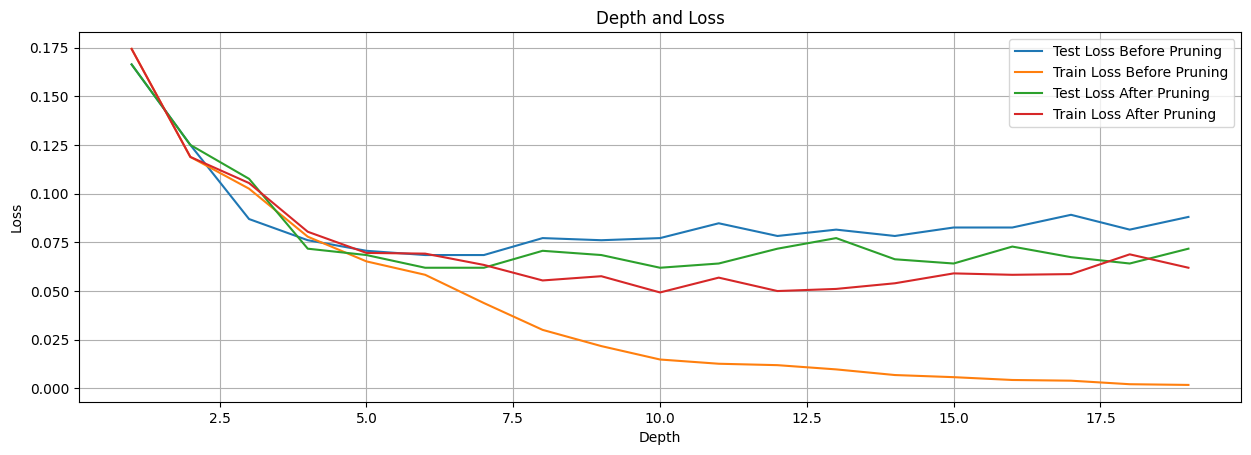

In [ ]:
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("Depth")
plt.ylabel("Loss")
plt.title("Depth and Loss")

plt.plot(depth_dict['Depth'], depth_dict['TestLossBeforePruning'], label="Test Loss Before Pruning")
plt.plot(depth_dict['Depth'], depth_dict['TrainLossBeforePruning'], label="Train Loss Before Pruning")
plt.plot(depth_dict['Depth'], depth_dict['TestLossAfterPruning'], label="Test Loss After Pruning")
plt.plot(depth_dict['Depth'], depth_dict['TrainLossAfterPruning'], label="Train Loss After Pruning")

plt.legend()
plt.show()

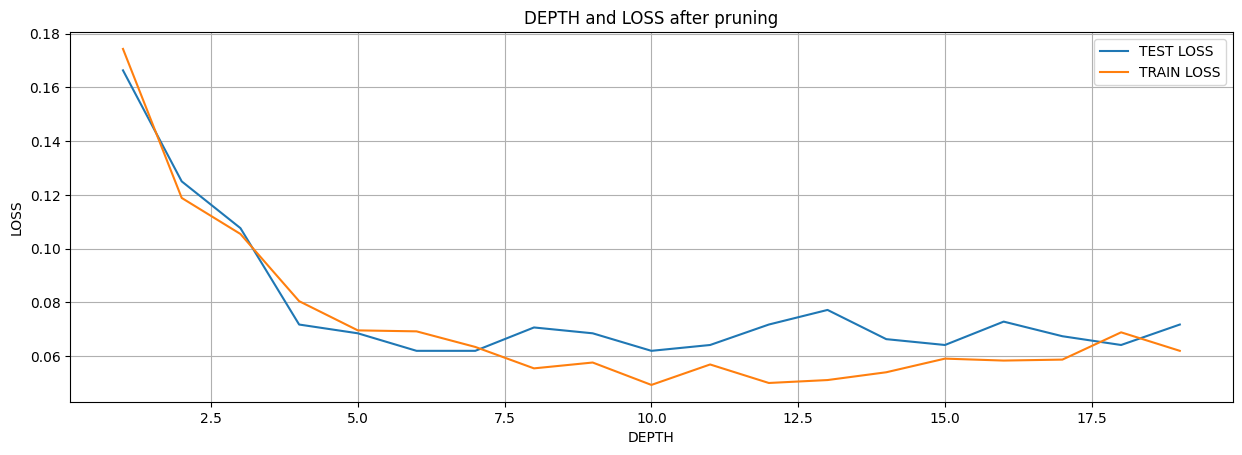

In [ ]:
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("DEPTH")
plt.ylabel("LOSS")
plt.title("DEPTH and LOSS after pruning")

plt.plot(depth_dict['Depth'], depth_dict['TestLossAfterPruning'], label="TEST LOSS")
plt.plot(depth_dict['Depth'], depth_dict['TrainLossAfterPruning'], label="TRAIN LOSS")

plt.legend()
plt.show()

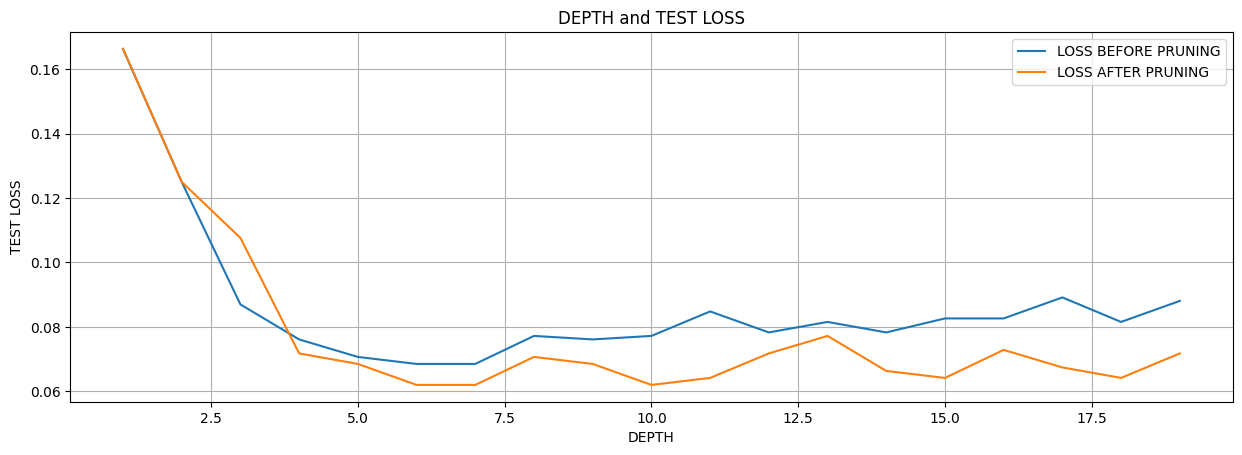

In [ ]:
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("DEPTH")
plt.ylabel("TEST LOSS")
plt.title("DEPTH and TEST LOSS")

plt.plot(depth_dict['Depth'], depth_dict['TestLossBeforePruning'], label="LOSS BEFORE PRUNING")
plt.plot(depth_dict['Depth'], depth_dict['TestLossAfterPruning'], label="LOSS AFTER PRUNING")

plt.legend()
plt.show()

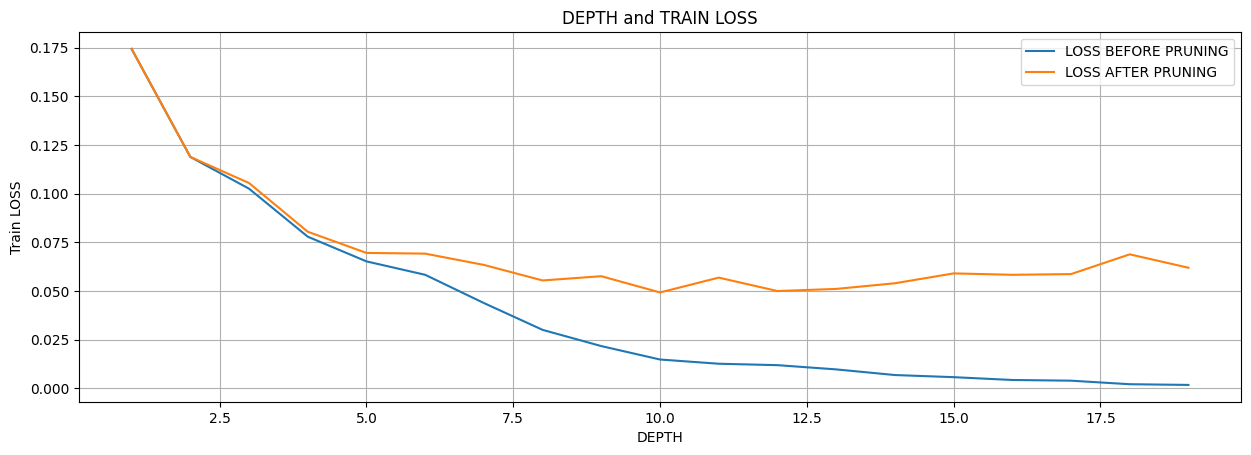

In [ ]:
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("DEPTH")
plt.ylabel("Train LOSS")
plt.title("DEPTH and TRAIN LOSS")

plt.plot(depth_dict['Depth'], depth_dict['TrainLossBeforePruning'], label="LOSS BEFORE PRUNING")
plt.plot(depth_dict['Depth'], depth_dict['TrainLossAfterPruning'], label="LOSS AFTER PRUNING")

plt.legend()
plt.show()

In [ ]:
#gini vs entropy evaluation using depth of 6 as that is the ideal depth for now
Entropy_dict = {'TrainingIterations':[],'TrainLossBeforePruning':[],'TrainLossAfterPruning':[],'TestLossBeforePruning':[],'TestLossAfterPruning':[]}
Gini_dict = {'TrainingIterations':[],'TrainLossBeforePruning':[],'TrainLossAfterPruning':[],'TestLossBeforePruning':[],'TestLossAfterPruning':[]}

for i in range (0,5):
  dtc = DecisionTreeClassifier(criterion="gini",max_depth = 6, random_state=i).fit(x_train, y_train)  # Exclude the target column name
  Gini_dict['TrainLossBeforePruning'].append(1-(dtc.score(x_train, y_train)))
  Gini_dict['TestLossBeforePruning'].append(1-(dtc.score(x_test, y_test)))
  prune_tree(dtc, 0, x_validation, y_validation)
  Gini_dict['TrainLossAfterPruning'].append(1-(dtc.score(x_train, y_train)))
  Gini_dict['TestLossAfterPruning'].append(1-(dtc.score(x_test, y_test)))
  Gini_dict['TrainingIterations'].append(i)


  dtc = DecisionTreeClassifier(criterion="entropy",max_depth = 6, random_state=i).fit(x_train, y_train)  # Exclude the target column name
  Entropy_dict['TrainLossBeforePruning'].append(1-(dtc.score(x_train, y_train)))
  Entropy_dict['TestLossBeforePruning'].append(1-(dtc.score(x_test, y_test)))
  prune_tree(dtc, 0, x_validation, y_validation)
  Entropy_dict['TrainLossAfterPruning'].append(1-(dtc.score(x_train, y_train)))
  Entropy_dict['TestLossAfterPruning'].append(1-(dtc.score(x_test, y_test)))
  Entropy_dict['TrainingIterations'].append(i)

In [ ]:
for e in Entropy_dict['TestLossAfterPruning']:
  print(e)

0.08478260869565213
0.08369565217391306
0.08695652173913049
0.08260869565217388
0.08369565217391306


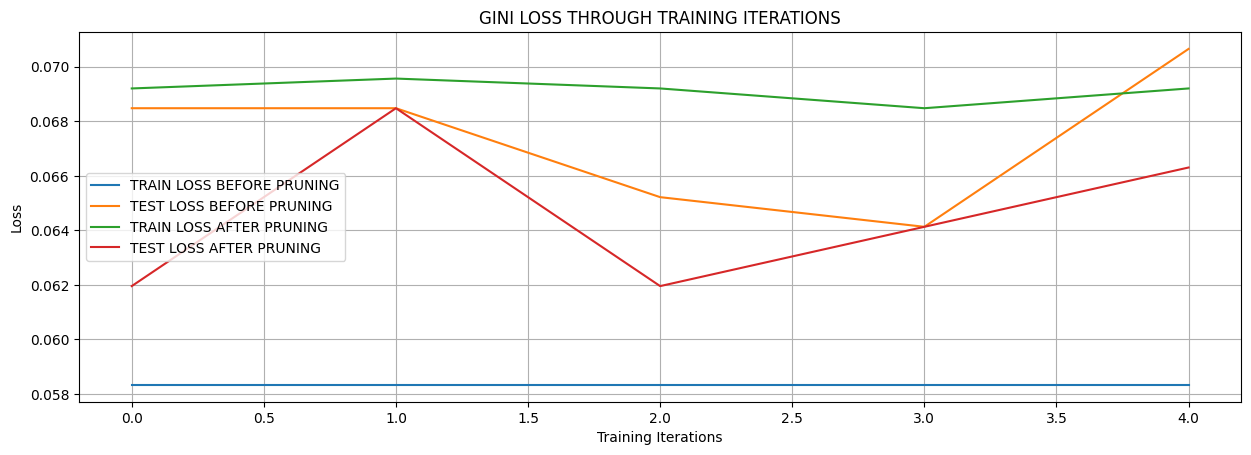

In [ ]:
#gini loss
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("Training Iterations")
plt.ylabel("Loss")
plt.title("GINI LOSS THROUGH TRAINING ITERATIONS")

plt.plot(Gini_dict['TrainingIterations'], Gini_dict['TrainLossBeforePruning'], label="TRAIN LOSS BEFORE PRUNING")
plt.plot(Gini_dict['TrainingIterations'], Gini_dict['TestLossBeforePruning'], label="TEST LOSS BEFORE PRUNING")
plt.plot(Gini_dict['TrainingIterations'], Gini_dict['TrainLossAfterPruning'], label="TRAIN LOSS AFTER PRUNING")
plt.plot(Gini_dict['TrainingIterations'], Gini_dict['TestLossAfterPruning'], label="TEST LOSS AFTER PRUNING")

plt.legend()
plt.show()

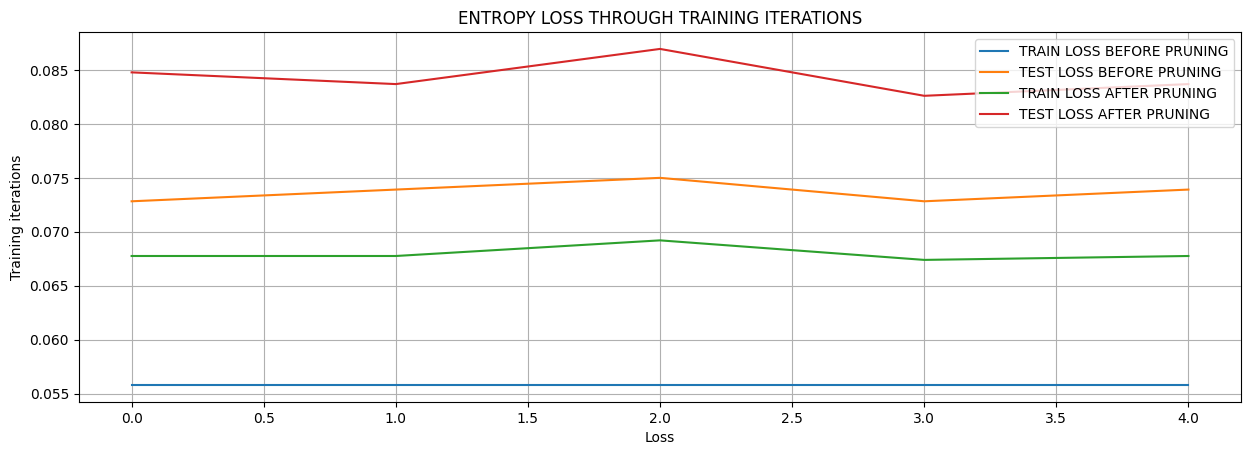

In [ ]:
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("Loss")
plt.ylabel("Training iterations")
plt.title("ENTROPY LOSS THROUGH TRAINING ITERATIONS")

plt.plot(Entropy_dict['TrainingIterations'], Entropy_dict['TrainLossBeforePruning'], label="TRAIN LOSS BEFORE PRUNING")
plt.plot(Entropy_dict['TrainingIterations'], Entropy_dict['TestLossBeforePruning'], label="TEST LOSS BEFORE PRUNING")
plt.plot(Entropy_dict['TrainingIterations'], Entropy_dict['TrainLossAfterPruning'], label="TRAIN LOSS AFTER PRUNING")
plt.plot(Entropy_dict['TrainingIterations'], Entropy_dict['TestLossAfterPruning'], label="TEST LOSS AFTER PRUNING")

plt.legend()
plt.show()

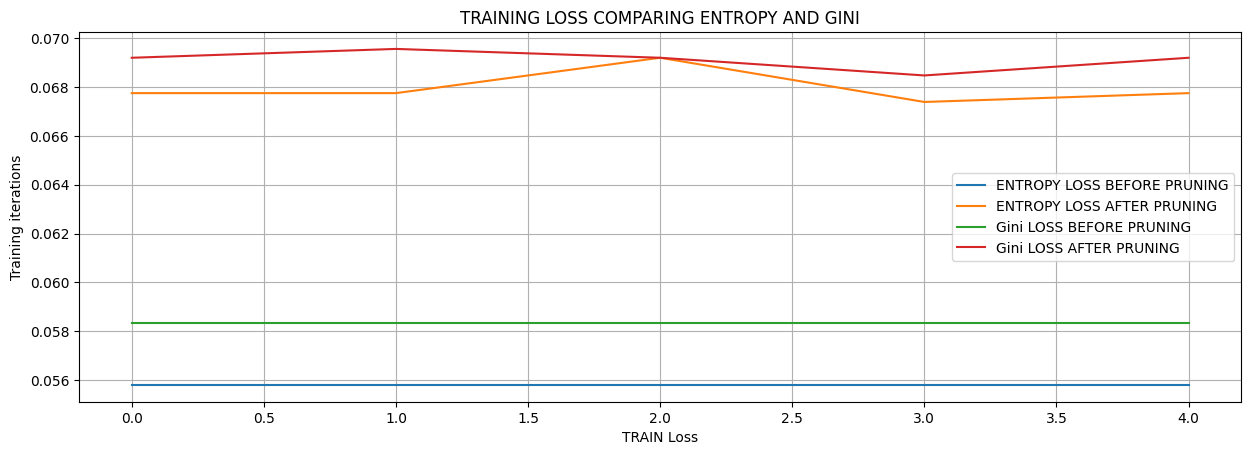

In [ ]:
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("TRAIN Loss")
plt.ylabel("Training iterations")
plt.title("TRAINING LOSS COMPARING ENTROPY AND GINI")

plt.plot(Entropy_dict['TrainingIterations'],Entropy_dict['TrainLossBeforePruning'], label="ENTROPY LOSS BEFORE PRUNING")
plt.plot(Entropy_dict['TrainingIterations'],Entropy_dict['TrainLossAfterPruning'], label="ENTROPY LOSS AFTER PRUNING")
plt.plot(Gini_dict['TrainingIterations'], Gini_dict['TrainLossBeforePruning'], label="Gini LOSS BEFORE PRUNING")
plt.plot(Gini_dict['TrainingIterations'], Gini_dict['TrainLossAfterPruning'], label="Gini LOSS AFTER PRUNING")

plt.legend()
plt.show()

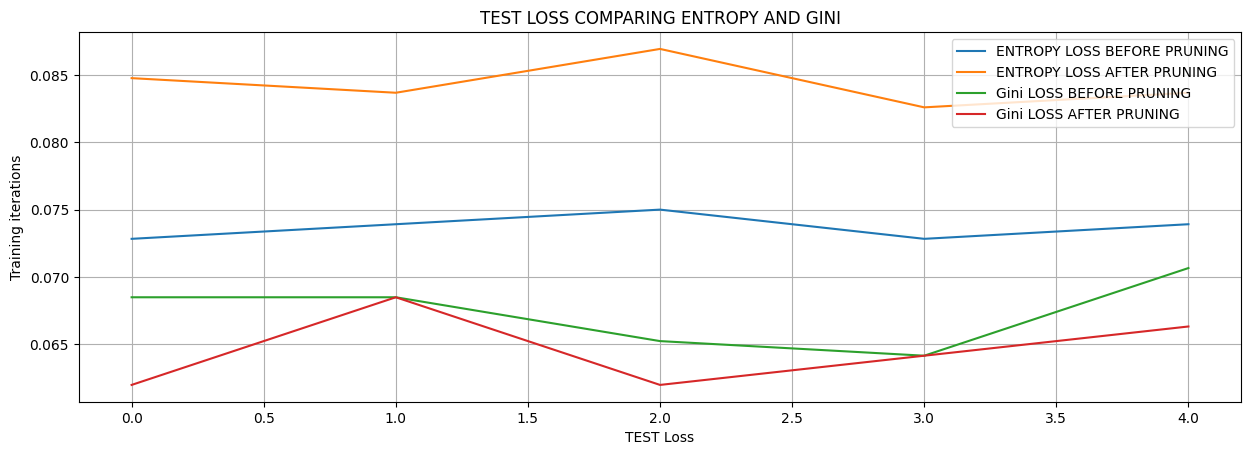

In [ ]:
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("TEST Loss")
plt.ylabel("Training iterations")
plt.title("TEST LOSS COMPARING ENTROPY AND GINI")

plt.plot(Entropy_dict['TrainingIterations'],Entropy_dict['TestLossBeforePruning'], label="ENTROPY LOSS BEFORE PRUNING")
plt.plot(Entropy_dict['TrainingIterations'], Entropy_dict['TestLossAfterPruning'], label="ENTROPY LOSS AFTER PRUNING")
plt.plot(Gini_dict['TrainingIterations'], Gini_dict['TestLossBeforePruning'], label="Gini LOSS BEFORE PRUNING")
plt.plot(Gini_dict['TrainingIterations'], Gini_dict['TestLossAfterPruning'], label="Gini LOSS AFTER PRUNING")

plt.legend()
plt.show()

In [ ]:
#probably evaluate training splits too uuuuuhghghghghghgh
#use gini and max depth of 6
#start with test and validation sizes
#try test size @ 0.1 0.3 0.5 0.7 and 0.9
test_size_dict = {'Size':[0.1, 0.3, 0.5, 0.7, 0.9, 1],'TrainLossBeforePruning':[],'TestLossBeforePruning':[], 'TrainLossAfterPruning':[],'TestLossAfterPruning':[]}

for i in range(0,len(test_size_dict['Size'])):
  x_train, x_temp, y_train, y_temp = train_test_split(x,y, train_size=0.6, random_state=i, shuffle=True)
  x_validation, x_test, y_validation, y_test = train_test_split(x_temp, y_temp, test_size=test_size_dict['Size'][i], random_state = 0, shuffle = True)
  dtc = DecisionTreeClassifier(criterion = "gini", max_depth = 6, random_state=0).fit(x_train, y_train)

  test_size_dict['TrainLossBeforePruning'].append(1-dtc.score(x_train, y_train))
  test_size_dict['TestLossBeforePruning'].append(1-dtc.score(x_test, y_test))
  prune_tree(dtc, 0, x_validation, y_validation)
  test_size_dict['TrainLossAfterPruning'].append(1-dtc.score(x_train, y_train))
  test_size_dict['TestLossAfterPruning'].append(1-dtc.score(x_test, y_test))

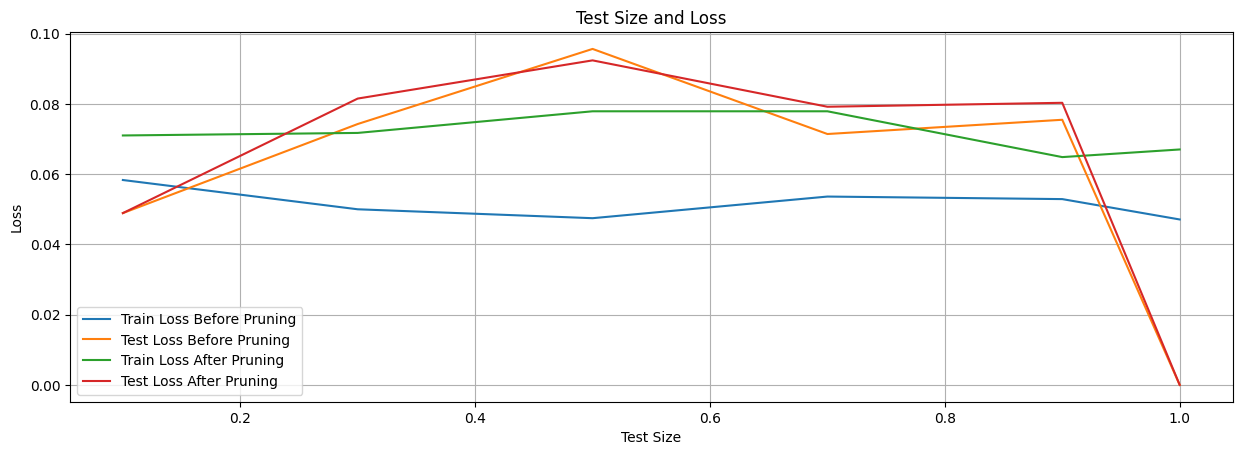

In [ ]:
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("Test Size")
plt.ylabel("Loss")
plt.title("Test Size and Loss")

plt.plot(test_size_dict['Size'], test_size_dict['TrainLossBeforePruning'], label="Train Loss Before Pruning")
plt.plot(test_size_dict['Size'], test_size_dict['TestLossBeforePruning'], label="Test Loss Before Pruning")
plt.plot(test_size_dict['Size'], test_size_dict['TrainLossAfterPruning'], label="Train Loss After Pruning")
plt.plot(test_size_dict['Size'], test_size_dict['TestLossAfterPruning'], label="Test Loss After Pruning")
plt.legend()
plt.show()

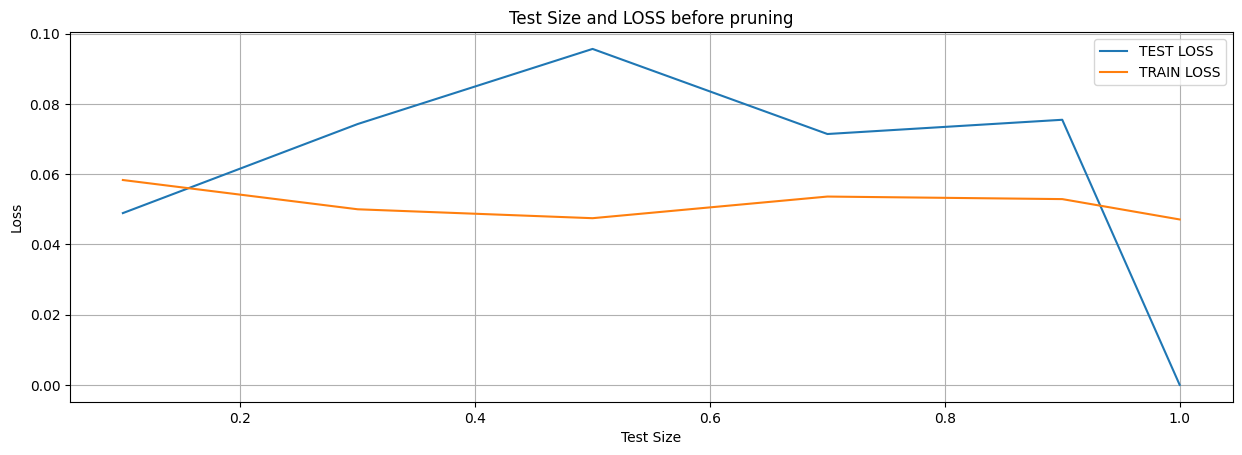

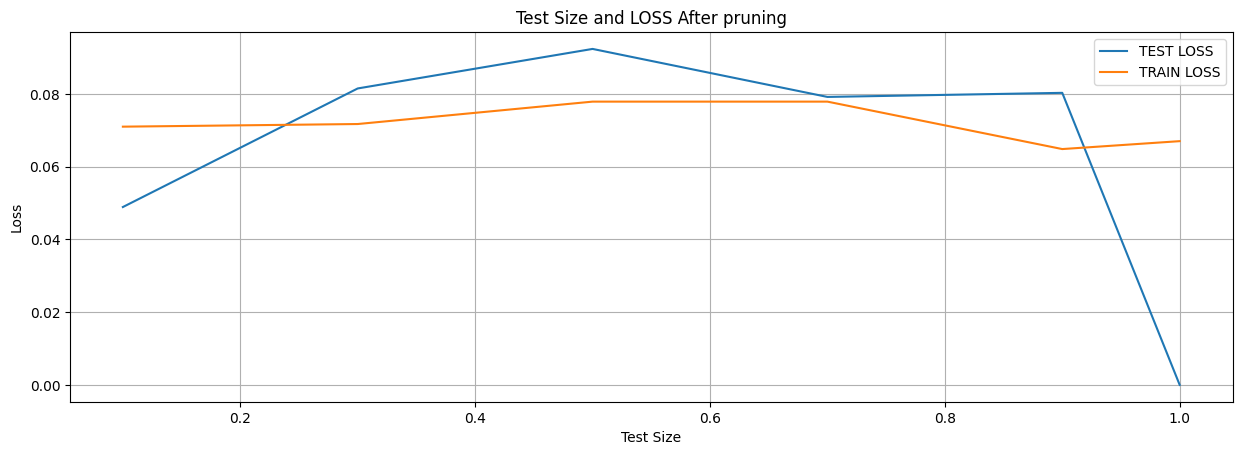

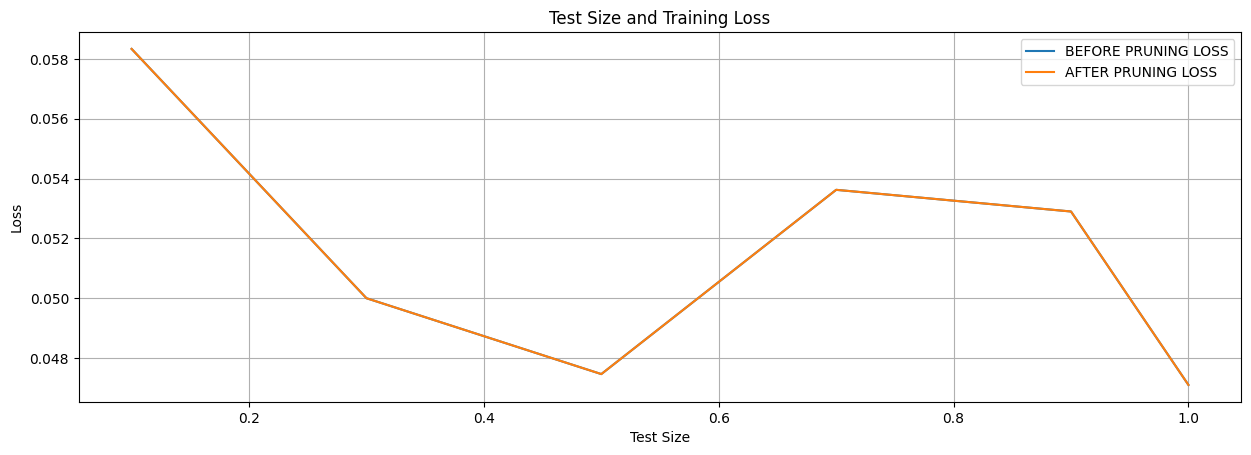

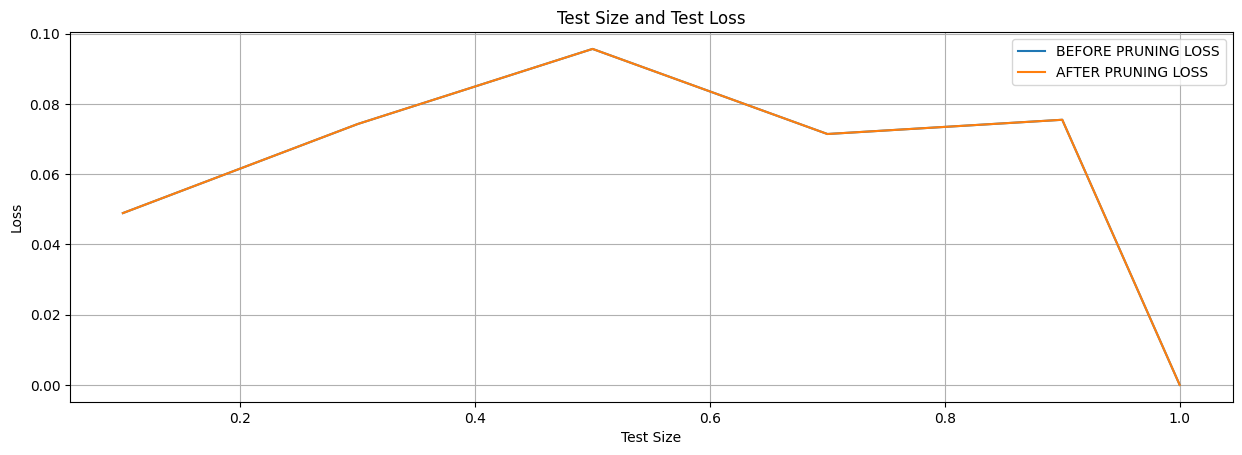

In [ ]:
########################################
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("Test Size")
plt.ylabel("Loss")
plt.title("Test Size and LOSS before pruning")

plt.plot(test_size_dict['Size'], test_size_dict['TestLossBeforePruning'], label="TEST LOSS")
plt.plot(test_size_dict['Size'], test_size_dict['TrainLossBeforePruning'], label="TRAIN LOSS")

plt.legend()
plt.show()
########################################
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("Test Size")
plt.ylabel("Loss")
plt.title("Test Size and LOSS After pruning")

plt.plot(test_size_dict['Size'], test_size_dict['TestLossAfterPruning'], label="TEST LOSS")
plt.plot(test_size_dict['Size'], test_size_dict['TrainLossAfterPruning'], label="TRAIN LOSS")

plt.legend()
plt.show()
########################################
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("Test Size")
plt.ylabel("Loss")
plt.title("Test Size and Training Loss")

plt.plot(test_size_dict['Size'], test_size_dict['TrainLossBeforePruning'], label="BEFORE PRUNING LOSS")
plt.plot(test_size_dict['Size'], test_size_dict['TrainLossBeforePruning'], label="AFTER PRUNING LOSS")

plt.legend()
plt.show()
########################################
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("Test Size")
plt.ylabel("Loss")
plt.title("Test Size and Test Loss")

plt.plot(test_size_dict['Size'], test_size_dict['TestLossBeforePruning'], label="BEFORE PRUNING LOSS")
plt.plot(test_size_dict['Size'], test_size_dict['TestLossBeforePruning'], label="AFTER PRUNING LOSS")

plt.legend()
plt.show()

In [ ]:
#probably evaluate training splits too uuuuuhghghghghghgh
#use gini and max depth of 6
#start with test and validation sizes
#try train size @ 0.1 0.3 0.5 0.7 and 0.9
'''
test_size = 0.2
validation_size = 0.2
train_size = 0.6
'''

train_size_dict = {'Size':[0.1, 0.3, 0.5, 0.7, 0.9, 1],'TrainLossBeforePruning':[],'TestLossBeforePruning':[], 'TrainLossAfterPruning':[],'TestLossAfterPruning':[]}


for i in train_size_dict['Size']:
  x_train, x_temp, y_train, y_temp = train_test_split(x,y, train_size=i, random_state=0, shuffle=True)
  x_validation, x_test, y_validation, y_test= train_test_split(x_temp, y_temp, test_size=0.5, random_state = 0, shuffle = True)

  x_train = x_train[:int(i*x_train.shape[0])]
  y_train = y_train[:int(i*y_train.shape[0])]

  dtc = DecisionTreeClassifier(criterion = "gini", max_depth = 6, random_state=0).fit(x_train, y_train)
  '''
  test_accuracy_before_pruning = dtc.score(x_test, y_test)
  train_accuracy_before_pruning = dtc.score(x_train, y_train)
  prune_tree(dtc, 0, x_validation, y_validation)
  test_accuracy_after_pruning = dtc.score(x_test, y_test)
  train_accuracy_after_pruning = dtc.score(x_train, y_train)
  '''
  train_size_dict['TrainLossBeforePruning'].append(1-dtc.score(x_train, y_train))
  train_size_dict['TestLossBeforePruning'].append(1-dtc.score(x_test, y_test))
  prune_tree(dtc, 0, x_validation, y_validation)
  train_size_dict['TrainLossAfterPruning'].append(1-dtc.score(x_train, y_train))
  train_size_dict['TestLossAfterPruning'].append(1-dtc.score(x_test, y_test))


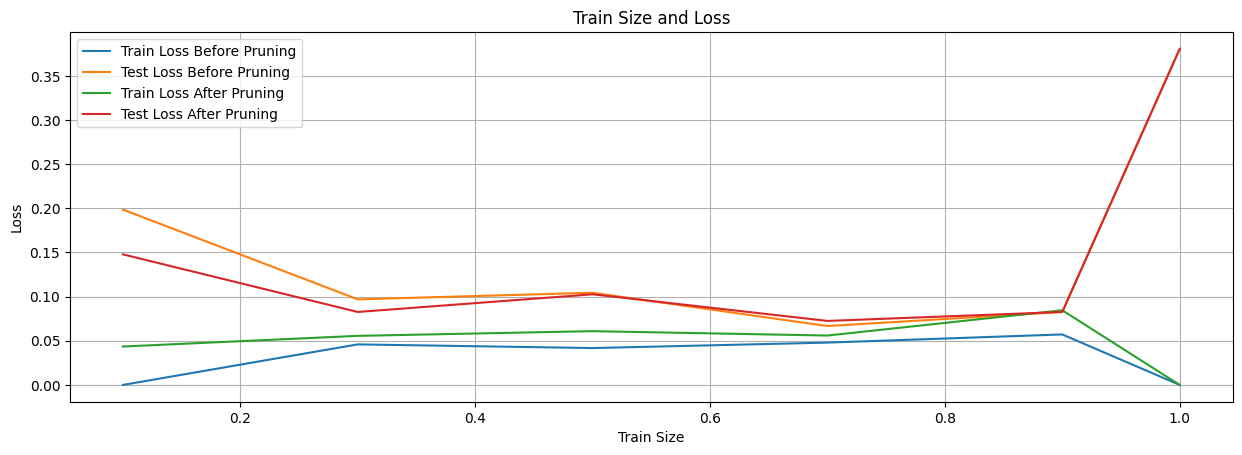

In [ ]:
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("Train Size")
plt.ylabel("Loss")
plt.title("Train Size and Loss")

plt.plot(train_size_dict['Size'], train_size_dict['TrainLossBeforePruning'], label="Train Loss Before Pruning")
plt.plot(train_size_dict['Size'], train_size_dict['TestLossBeforePruning'], label="Test Loss Before Pruning")
plt.plot(train_size_dict['Size'], train_size_dict['TrainLossAfterPruning'], label="Train Loss After Pruning")
plt.plot(train_size_dict['Size'], train_size_dict['TestLossAfterPruning'], label="Test Loss After Pruning")
plt.legend()
plt.show()

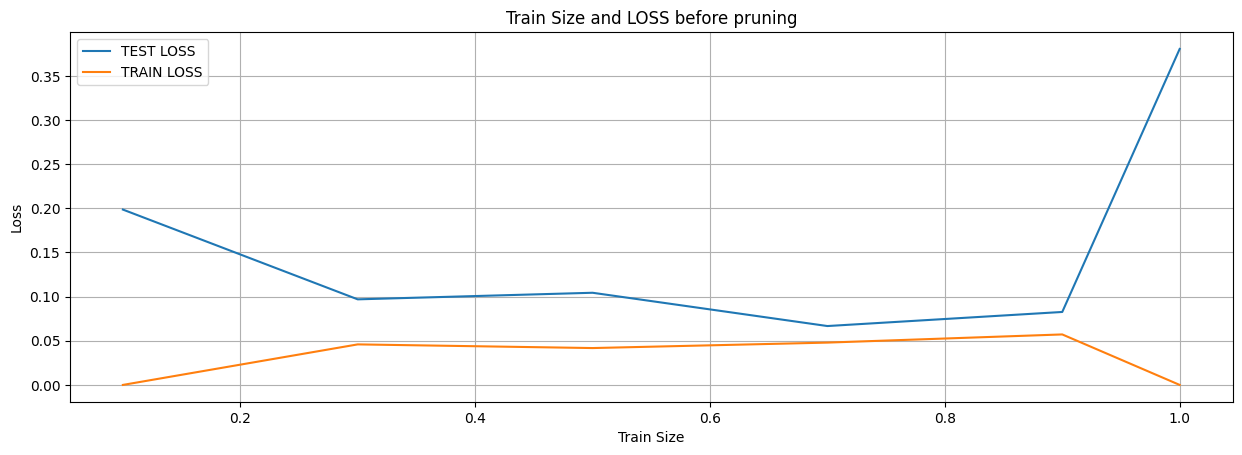

In [ ]:
########################################
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("Train Size")
plt.ylabel("Loss")
plt.title("Train Size and LOSS before pruning")

plt.plot(train_size_dict['Size'], train_size_dict['TestLossBeforePruning'], label="TEST LOSS")
plt.plot(train_size_dict['Size'], train_size_dict['TrainLossBeforePruning'], label="TRAIN LOSS")

plt.legend()
plt.show()



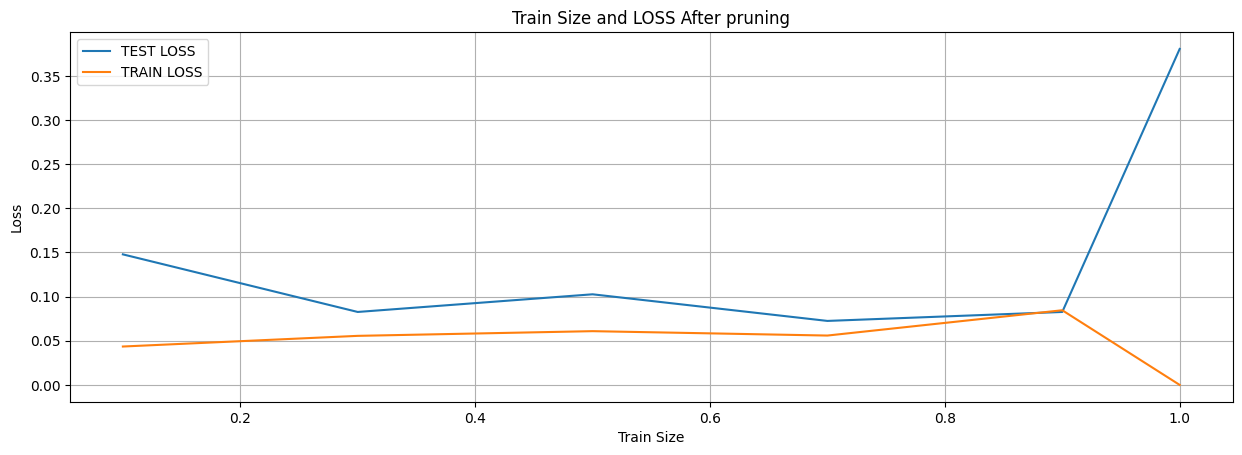

In [ ]:
########################################
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("Train Size")
plt.ylabel("Loss")
plt.title("Train Size and LOSS After pruning")

plt.plot(train_size_dict['Size'], train_size_dict['TestLossAfterPruning'], label="TEST LOSS")
plt.plot(train_size_dict['Size'], train_size_dict['TrainLossAfterPruning'], label="TRAIN LOSS")

plt.legend()
plt.show()


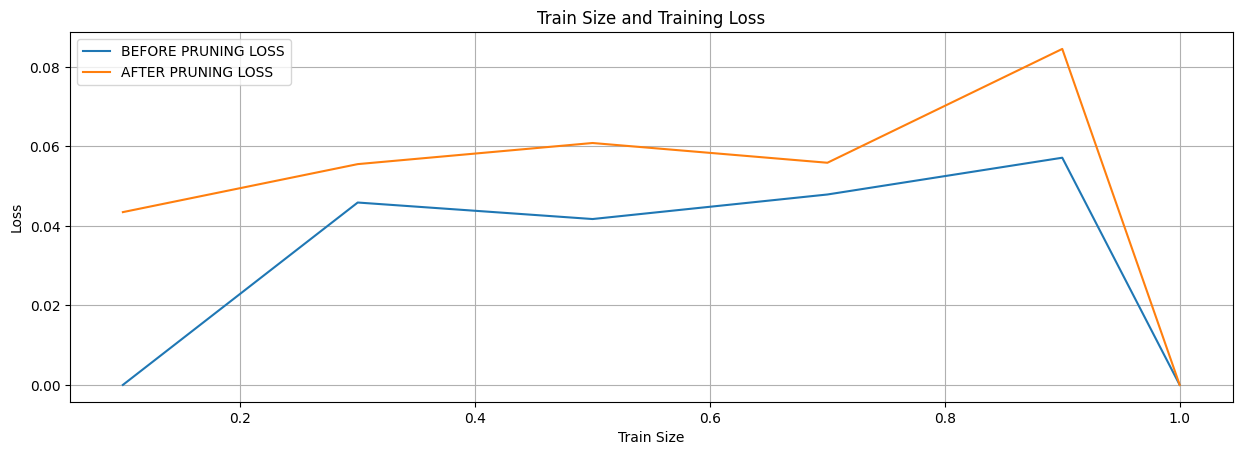

In [ ]:
########################################
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("Train Size")
plt.ylabel("Loss")
plt.title("Train Size and Training Loss")

plt.plot(train_size_dict['Size'], train_size_dict['TrainLossBeforePruning'], label="BEFORE PRUNING LOSS")
plt.plot(train_size_dict['Size'], train_size_dict['TrainLossAfterPruning'], label="AFTER PRUNING LOSS")

plt.legend()
plt.show()

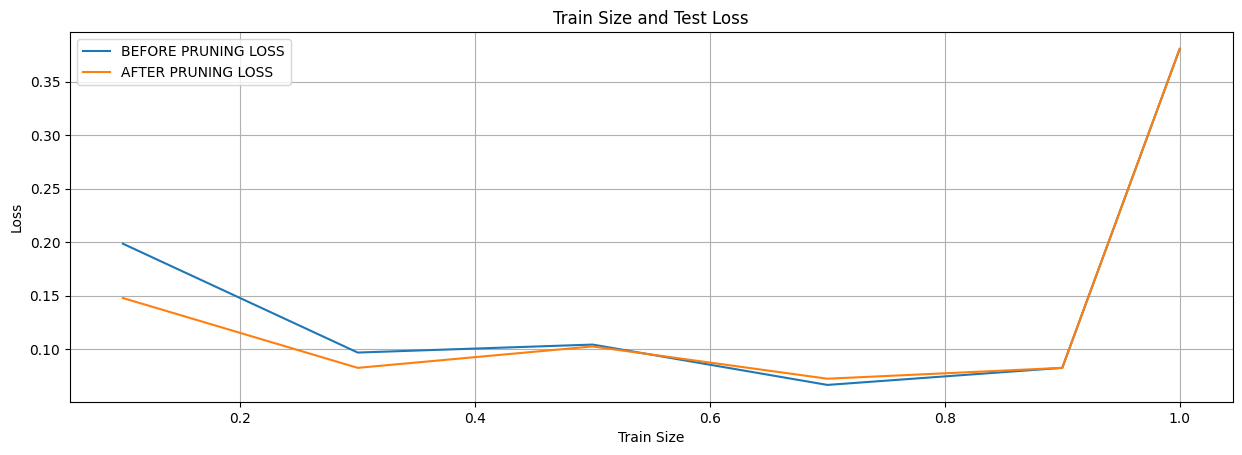

In [ ]:
########################################
plt.figure().set_figwidth(15)
plt.grid(True)

plt.xlabel("Train Size")
plt.ylabel("Loss")
plt.title("Train Size and Test Loss")

plt.plot(train_size_dict['Size'], train_size_dict['TestLossBeforePruning'], label="BEFORE PRUNING LOSS")
plt.plot(train_size_dict['Size'], train_size_dict['TestLossAfterPruning'], label="AFTER PRUNING LOSS")

plt.legend()
plt.show()